In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
projectReleaseDate_g = pd.read_csv("/mnt/17volume/data/snapshot_release_git_linh.csv")
projectReleaseDate_o = pd.read_csv("/mnt/17volume/data/snapshot_release_other_linh.csv")
projectReleaseDate = pd.concat([projectReleaseDate_g, projectReleaseDate_o]).drop_duplicates()
projectReleaseDate.info()
projectReleaseDate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   snapshot_id  1185 non-null   int64 
 1   release_id   1185 non-null   object
 2   date         1185 non-null   int64 
 3   author       1185 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 46.3+ KB


,snapshot_id,release_id,date,author
0,10000002,ad50d6158d9db230c8d0865b332d7b84f0031d85,1354119368,43455
1,10000002,2f573123f570b29c55c903daee45728dea568611,1353621146,43455
2,10000002,99b403c381a05cb12867f31d1f1c84257bace0e3,1353620363,43455
3,10000002,445992fd94e836470065bf02dabbcfbb36eda8f9,1353029061,43455
4,10000002,689ca7d6ded7cfba285d0e6cbae1194a6b10c858,1352075828,207817


In [3]:
projectReleaseDate['lagged'] = projectReleaseDate.groupby(['snapshot_id'])['date'].shift(1)
projectReleaseDate = projectReleaseDate[projectReleaseDate['lagged'].notnull()]
projectReleaseDate['mean_cycle_time'] = projectReleaseDate['lagged'] - projectReleaseDate['date']
projectReleaseDate.head()

,snapshot_id,release_id,date,author,lagged,mean_cycle_time
1,10000002,2f573123f570b29c55c903daee45728dea568611,1353621146,43455,1.354119e+09,498222.0
2,10000002,99b403c381a05cb12867f31d1f1c84257bace0e3,1353620363,43455,1.353621e+09,783.0
3,10000002,445992fd94e836470065bf02dabbcfbb36eda8f9,1353029061,43455,1.353620e+09,591302.0
4,10000002,689ca7d6ded7cfba285d0e6cbae1194a6b10c858,1352075828,207817,1.353029e+09,953233.0
5,10000002,c4da0906dbfa90c098b0c01ff57b49e09cb55af2,1352075650,207817,1.352076e+09,178.0


In [4]:
projectCycleTime = projectReleaseDate[['snapshot_id','mean_cycle_time']].groupby('snapshot_id', as_index=False).mean()
projectCycleTime.to_csv("mean_cycle_time_metrics.csv", encoding='utf-8', index=False)
projectReleaseDate.info()
projectCycleTime.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 1 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   snapshot_id      1050 non-null   int64  
 1   release_id       1050 non-null   object 
 2   date             1050 non-null   int64  
 3   author           1050 non-null   int64  
 4   lagged           1050 non-null   float64
 5   mean_cycle_time  1050 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 57.4+ KB


,snapshot_id,mean_cycle_time
0,1000047,2.262263e+06
1,1000048,5.072456e+06
2,1000174,1.074825e+07
3,10000002,4.087436e+05
4,10000080,4.618572e+06


In [5]:
projectGitMetrics = pd.read_csv("/mnt/17volume/data/project-git-metrics.csv")
projectOtherMetrics = pd.read_csv("/mnt/17volume/data/project-other-metrics.csv")

projectMetrics = pd.concat([projectGitMetrics, projectOtherMetrics]).drop_duplicates()
projectMetrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snapshot_id         1079 non-null   int64  
 1   total_revisions     1079 non-null   int64  
 2   total_authors       1079 non-null   int64  
 3   revision_frequency  1079 non-null   float64
 4   author_frequency    1079 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 50.6 KB


In [6]:
# longevity
rawData1 = pd.read_csv("/mnt/17volume/data/snapshot_revision_git_bao.csv")
rawData2 = pd.read_csv("/mnt/17volume/data/snapshot_revision_other_bao.csv")
rawData = pd.concat([rawData1, rawData2])
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146705 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   snapshot_id  146705 non-null  int64 
 1   id           146705 non-null  object
 2   date         146705 non-null  int64 
 3   author       146705 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.6+ MB


In [7]:
table = rawData.sort_values(['snapshot_id', 'date'], ascending=[True, True])

table2 = table[['snapshot_id','date']]

table3 = table2.groupby(['snapshot_id'], as_index=True)['date'].agg(['first', 'last']).reset_index()

table3['longevity'] = table3['last'] - table3['first']

# table3['longevity'] = pd.to_timedelta(table3['longevity'], unit='ms')

longevityMetric = table3[['snapshot_id','longevity']]

longevityMetric.to_csv("longevity_metrics.csv", encoding='utf-8', index=False)

projectMetrics = pd.merge(projectMetrics, longevityMetric, on='snapshot_id', how='outer')

projectMetrics.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snapshot_id         1079 non-null   int64  
 1   total_revisions     1079 non-null   int64  
 2   total_authors       1079 non-null   int64  
 3   revision_frequency  1079 non-null   float64
 4   author_frequency    1079 non-null   float64
 5   longevity           1079 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 59.0 KB


In [8]:
projectMetrics = pd.merge(projectMetrics, projectCycleTime, on='snapshot_id', how='outer')

projectMetrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snapshot_id         1079 non-null   int64  
 1   total_revisions     1079 non-null   int64  
 2   total_authors       1079 non-null   int64  
 3   revision_frequency  1079 non-null   float64
 4   author_frequency    1079 non-null   float64
 5   longevity           1079 non-null   int64  
 6   mean_cycle_time     111 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 67.4 KB


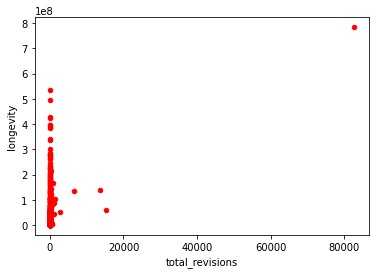

In [9]:
projectMetrics.plot(kind='scatter',x='total_revisions', y='longevity',color='red')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   snapshot_id         1079 non-null   int64  
 1   total_revisions     1079 non-null   int64  
 2   total_authors       1079 non-null   int64  
 3   revision_frequency  1079 non-null   float64
 4   author_frequency    1079 non-null   float64
 5   longevity           1079 non-null   int64  
 6   mean_cycle_time     111 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 67.4 KB
                    total_revisions  total_authors  revision_frequency  \
total_revisions            1.000000       0.947646            0.260570   
total_authors              0.947646       1.000000            0.241901   
revision_frequency         0.260570       0.241901            1.000000   
author_frequency           0.464420       0.471406            0.456402   
longevity                  0.374

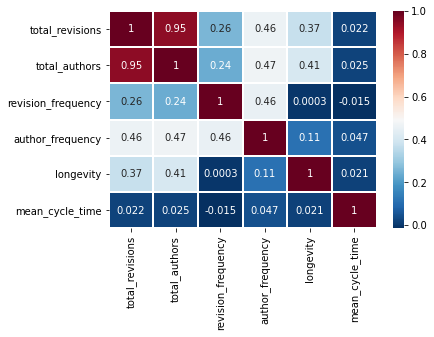

In [10]:
projectMetrics.info()
del projectMetrics['snapshot_id']
pearsonCorr = projectMetrics.corr(method='pearson')

pearsonCorr.to_csv("pearson_correlation_coefficient.csv", encoding='utf-8', index=True)

print(pearsonCorr)

sbplot = sb.heatmap(pearsonCorr, 
            xticklabels=pearsonCorr.columns,
            yticklabels=pearsonCorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

sbplot.get_figure().savefig("corr.png")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 4 to 1078
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_revisions     111 non-null    int64  
 1   total_authors       111 non-null    int64  
 2   revision_frequency  111 non-null    float64
 3   author_frequency    111 non-null    float64
 4   longevity           111 non-null    int64  
 5   mean_cycle_time     111 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 6.1 KB
                    total_revisions  total_authors  revision_frequency  \
total_revisions            1.000000       0.956799            0.557099   
total_authors              0.956799       1.000000            0.512956   
revision_frequency         0.557099       0.512956            1.000000   
author_frequency           0.931928       0.903526            0.622674   
longevity                  0.437691       0.432188            0.064174   
mean_cycl

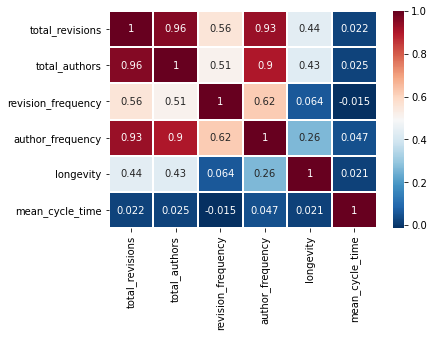

In [12]:
projectMetrics2 = projectMetrics[projectMetrics['mean_cycle_time'].notnull()]
projectMetrics2.info()
pearsonCorr = projectMetrics2.corr(method='pearson')

pearsonCorr.to_csv("pearson_correlation_coefficient.csv", encoding='utf-8', index=True)

print(pearsonCorr)

sbplot = sb.heatmap(pearsonCorr, 
            xticklabels=pearsonCorr.columns,
            yticklabels=pearsonCorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

sbplot.get_figure().savefig("corr.png")